In [1]:
import pandas as pd

## Группировка и агрегирование в pandas

In [4]:
titanic_df = pd.read_csv('titanic.csv')

In [5]:
titanic_df.head()

,PassengerID,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


In [6]:
# Необходимо подсчитать, сколько женщин и мужчин выжило, а сколько нет
titanic_df.groupby(['Sex', 'Survived'])['PassengerID'].count()

Sex     Survived
female  0           154
        1           308
male    0           709
        1           142
Name: PassengerID, dtype: int64

In [9]:
titanic_df.groupby(['PClass', 'Survived'])['PassengerID'].count()

PClass  Survived
*       0             1
1st     0           129
        1           193
2nd     0           160
        1           119
3rd     0           573
        1           138
Name: PassengerID, dtype: int64

## Сводные таблицы в pandas

сводные таблицы строятся через метод .pivot_table

In [11]:
# посчитать сколько всего женщин и мужчин было в конкретном классе корабля

# В качестве индекса будет пол человека, колонками станут значения из PClass, 
# функцией агрегирования будет count (подсчёт количества записей) по колонке Name
pvt = titanic_df.pivot_table(index=['Sex'], columns=['PClass'], values='Name', aggfunc='count')

In [12]:
pvt

PClass,*,1st,2nd,3rd
Sex,,,,
female,NaN,143.0,107.0,212.0
male,1.0,179.0,172.0,499.0


In [14]:
pvt.loc['female', ['1st', '2nd', '3rd']]

PClass
1st    143.0
2nd    107.0
3rd    212.0
Name: female, dtype: float64

## Анализ временных рядов

В качестве показательного примера используется цена на акции корпорации Apple за 5 лет по дням

In [15]:
df = pd.read_csv('apple.csv', index_col='Date', parse_dates=True)

In [16]:
df = df.sort_index()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-02-23 to 2017-02-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Volume     1258 non-null   int64  
 5   Adj Close  1258 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


формируем DataFrame с DatetimeIndex по колонке Date и сортируем новый индекс в правильном порядке для работы с выборками. Если колонка имеет формат даты и времени отличный от ISO8601, то для правильного перевода строки в нужный тип, можно использовать метод pandas.to_datetime.

In [18]:
# взять среднюю цену акции (mean) на закрытии (Close)
df.loc['2012-Feb', 'Close'].mean()

528.4820022

In [19]:
# взять промежуток с февраля 2012 по февраль 2015 и посчитать среднее
df.loc['2012-Feb':'2015-Feb', 'Close'].mean()

430.43968317018414

In [20]:
# взять среднюю цену закрытия по неделям
df.resample('W')['Close'].mean()

Date
2012-02-26    519.399979
2012-03-04    538.652008
2012-03-11    536.254004
2012-03-18    576.161993
2012-03-25    600.990001
                 ...    
2017-01-29    121.164000
2017-02-05    125.867999
2017-02-12    131.679996
2017-02-19    134.978000
2017-02-26    136.904999
Freq: W-SUN, Name: Close, Length: 262, dtype: float64

Resampling мощный инструмент при работе с временными рядами (time series), помогающий переформировать выборку так, как удобно
Метод resample первым аргументом принимает строку rule.

## Визуализация данных в pandas

Для визуального анализа данных, pandas использует библиотеку matplotlib. Простейший способ визуализации в pandas на примере с акциями Apple.

Берём цену закрытия в промежутке между 2012 и 2017.

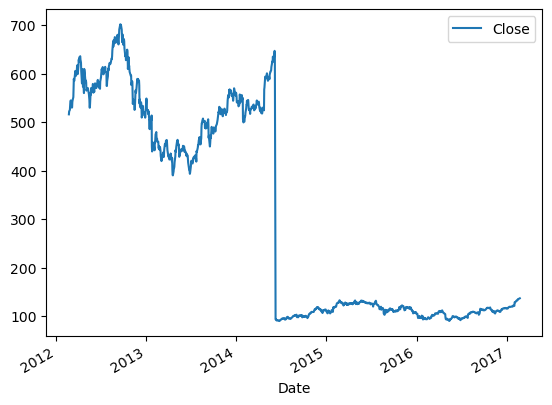

In [21]:
import matplotlib.pyplot as plt
new_sample_df = df.loc['2012-Feb':'2017-Feb', ['Close']]
new_sample_df.plot()
plt.show()

По оси X, если не задано явно, всегда будет индекс. По оси Y в нашем случае цена закрытия. Если внимательно посмотреть, то в 2014 году цена на акцию резко упала, это событие было связано с тем, что Apple проводила сплит 7 к 1.